In [45]:
from pprint import pprint
from lxml import html
import requests
from pymongo import MongoClient
import re

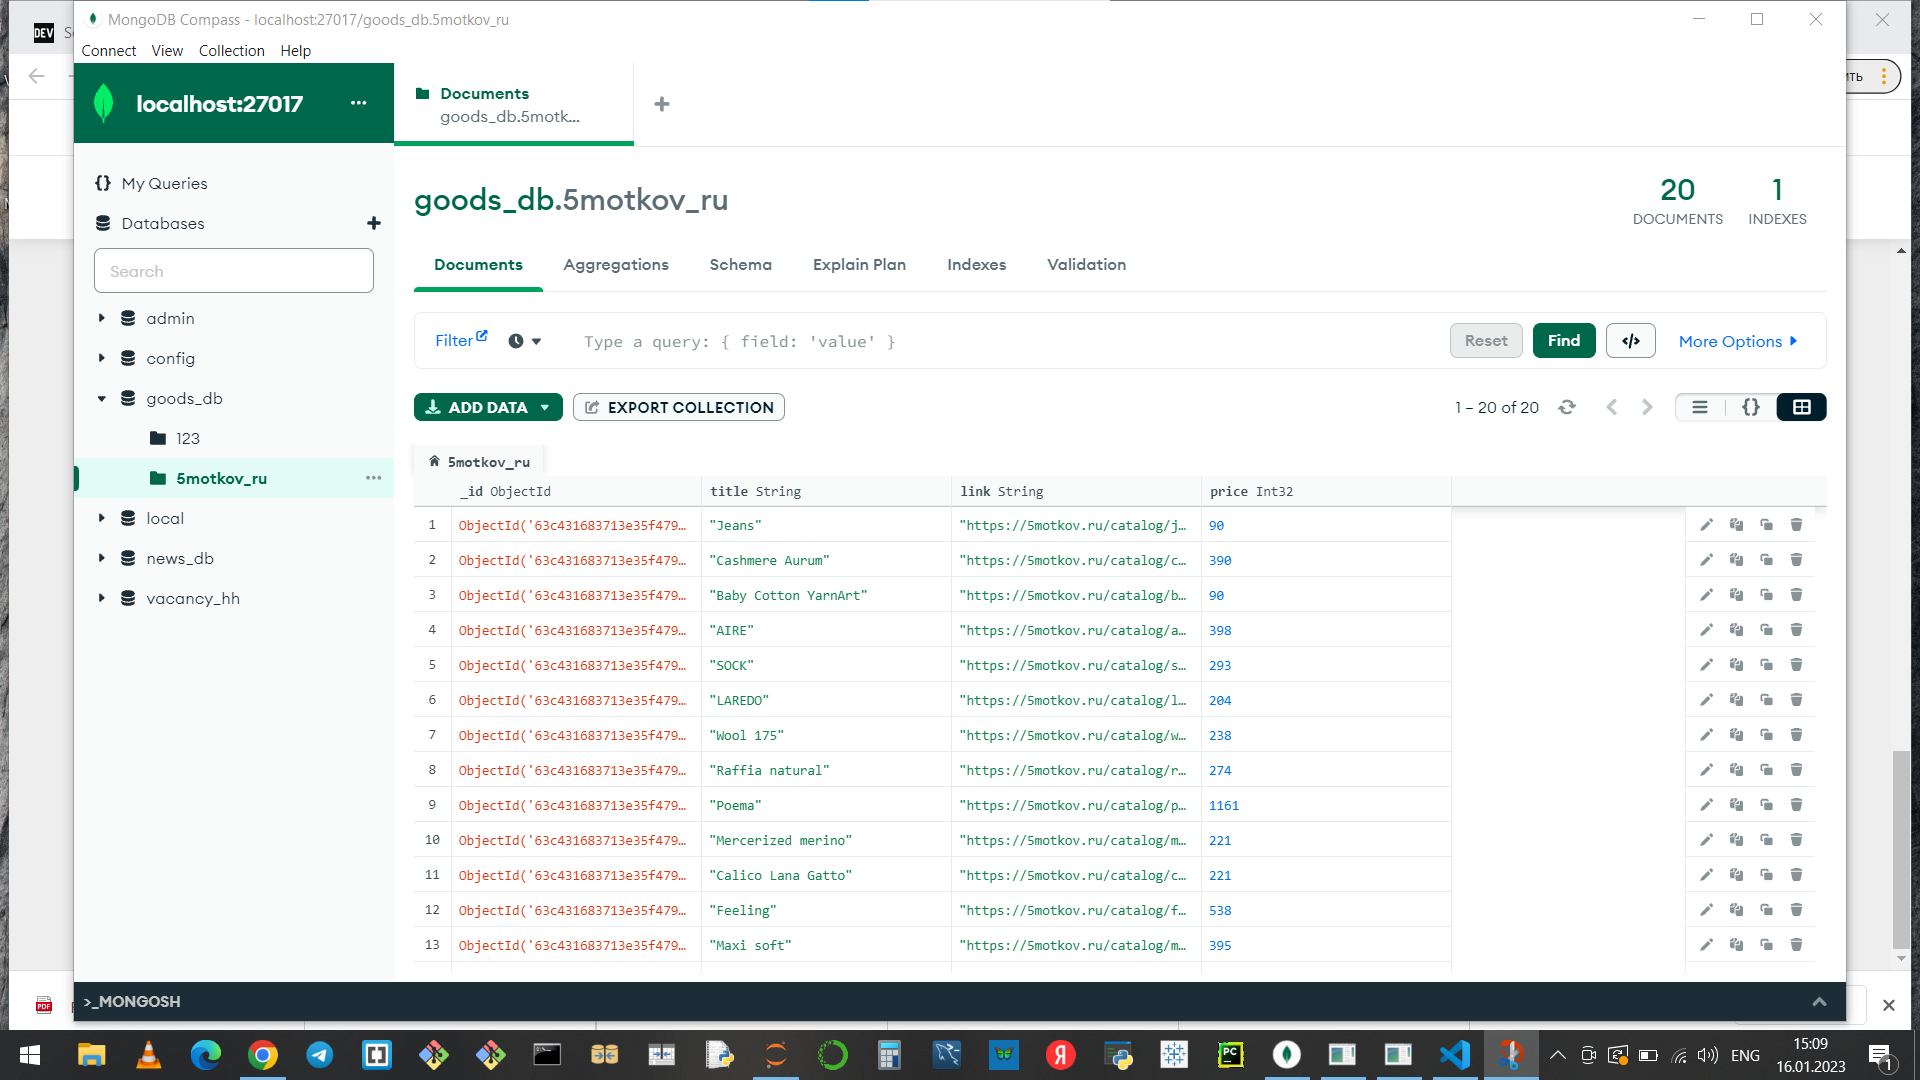

In [2]:
def group(rows):
    concat = ""
    for row in rows:
        concat = concat + str(row)
        rows = concat
    return rows

In [8]:
url = 'http://5motkov.ru/'

headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36'}

responce = requests.get(url, headers=headers)
dom = html.fromstring(responce.text)


In [6]:
regex = re.compile('[a-zA-Zа-яА-ЯёЁ.\s]')

In [112]:
goods_dict = {}
price_dict = {}
title_dict = {}
link_dict = {}

goodslist = dom.xpath("//div[@class='foto-block']")
    
prices_list = text.xpath("//div[@class='views-field views-field-field-price']/div/span/text()")
p = 1
for element in prices_list:
    price = group(element)
    if "руб." in price.lower():
        continue
    else:
        price = regex.sub("", price)
        price_dict[p] = {'price' : int(price)}
        p += 1
        
titles_list = text.xpath("//div[@class='foto-block']/div[@class='views-field views-field-name-1']/a/text()")
t = 1
for element in titles_list:
    title = group(element)
    title_dict[t] = {'title' : title}
    t += 1
    
links_list = text.xpath("//div[@class='foto-block']/div[@class='views-field views-field-name-1']/a/@href")
l = 1
for element in links_list:
    link = group(element)
    link = re.sub('//', 'https://', link)
    link_dict[l] = {'link' : link}
    l += 1

#Собираем итоговый список из разрозненных:
c = 1
for x in title_dict:
    #print ("\nНаименование:", goods_dict[x]['title'],"\n", "\nСсылка:", goods_dict[x]['link'], "\n","\nЦена:", goods_dict[x]['price'],"\n")
    goods_dict[c] = {'title': title_dict[c]['title'], 'link' : link_dict[c]['link'],'price' : price_dict[c]['price']}
    #print(goods_dict)
    c += 1

#Выводим сожержимое списка:
for x in goods_dict:
    print ("\nНаименование:", goods_dict[x]['title'],"\n", "\nСсылка:", goods_dict[x]['link'], "\n","\nЦена:", goods_dict[x]['price'],"\n")


Наименование: Jeans 
 
Ссылка: https://5motkov.ru/catalog/jeans/ 
 
Цена: 90 


Наименование: Cashmere Aurum 
 
Ссылка: https://5motkov.ru/catalog/cashmere-aurum/ 
 
Цена: 390 


Наименование: Baby Cotton YarnArt 
 
Ссылка: https://5motkov.ru/catalog/baby-cotton-yarnart/ 
 
Цена: 90 


Наименование: AIRE 
 
Ссылка: https://5motkov.ru/catalog/aire/ 
 
Цена: 398 


Наименование: SOCK 
 
Ссылка: https://5motkov.ru/catalog/sock/ 
 
Цена: 293 


Наименование: LAREDO 
 
Ссылка: https://5motkov.ru/catalog/laredo/ 
 
Цена: 204 


Наименование: Wool 175 
 
Ссылка: https://5motkov.ru/catalog/wool-175/ 
 
Цена: 238 


Наименование: Raffia natural 
 
Ссылка: https://5motkov.ru/catalog/raffia-natural/ 
 
Цена: 274 


Наименование: Poema 
 
Ссылка: https://5motkov.ru/catalog/poema/ 
 
Цена: 1161 


Наименование: Mercerized merino 
 
Ссылка: https://5motkov.ru/catalog/mercerized-merino/ 
 
Цена: 221 


Наименование: Calico Lana Gatto 
 
Ссылка: https://5motkov.ru/catalog/calico-lana-gatto/ 
 
Цена: 

In [106]:
client = MongoClient('localhost', 27017)
db = client['goods_db']
collection = db['5motkov_ru']

In [107]:
def insert_document(collection, data):
    return collection.insert_one(data).inserted_id

In [108]:
for n in goods_dict:
    if collection.count_documents({ 'link': goods_dict[n]['link'] }, limit=1 ) == 0:
        collection.insert_one(goods_dict[n])